# Models
### XGBoost adn MLP Classifier
Source: https://www.kaggle.com/vaibhav2025/airbnb-listings-reviews
Dataset file is original one preprocessed by PrepData notebook

In [19]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from keras import Sequential
from keras import layers
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import collections
from sklearn import *
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [83]:
df = pd.read_csv('Airbnb_Data/modelListings.csv')
df.head(5)

,listing_id,name,host_since,host_location,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood,latitude,longitude,...,balcony,Private_entrance,TV,Dedicated_workspace,Refrigerator,Cooking,Bathtub,Shower,price_category,price_catN
0,281420,"Beautiful Flat in le Village Montmartre, Paris",2011-12-03,"Paris, Ile-de-France, France",f,1.0,f,Buttes-Montmartre,48.88668,2.33343,...,False,False,False,False,False,False,False,False,Cheap,1.0
1,3705183,39 mÂ² Paris (Sacre CÅ“ur),2013-11-29,"Paris, Ile-de-France, France",f,1.0,t,Buttes-Montmartre,48.88617,2.34515,...,False,False,False,False,False,False,False,False,Average,2.0
2,4082273,"Lovely apartment with Terrace, 60m2",2014-07-31,"Paris, Ile-de-France, France",f,1.0,f,Elysee,48.88112,2.31712,...,False,False,True,False,False,False,False,False,Average,2.0
3,4797344,Cosy studio (close to Eiffel tower),2013-12-17,"Paris, Ile-de-France, France",f,1.0,t,Vaugirard,48.84571,2.30584,...,False,False,True,False,False,False,False,False,Cheap,1.0
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,2014-12-14,"Paris, Ile-de-France, France",f,1.0,f,Passy,48.85500,2.26979,...,False,False,True,False,False,False,True,False,Cheap,1.0


In [17]:
df.dtypes

listing_id                       int64
name                            object
host_since                      object
host_location                   object
host_is_superhost               object
host_total_listings_count      float64
host_identity_verified          object
neighbourhood                   object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bedrooms                       float64
price                            int64
minimum_nights                   int64
maximum_nights                   int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
instant_bookable                object
parking                  

In [108]:
df['price_catN'] = df['price_catN'].astype(int)

In [114]:
df['price_catN'].value_counts()

2    22090
1    21828
3     3876
Name: price_catN, dtype: int64

In [125]:
le = preprocessing.LabelEncoder()
y = df['price_catN']
X = df.drop(['price_category','price','listing_id','name','host_location', 'price_catN'], axis=1)
X = X.apply(le.fit_transform)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [127]:

scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

In [121]:

model = MLPClassifier(max_iter=100)
#specifikace parametru
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
#nalezeni nejlepsich parametru
clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=3)
#trenovani
clf.fit(train_scaled, y_train)

C:\Users\mates\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [122]:
#predikce
mlp_pred = clf.predict(test_scaled)

In [123]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, mlp_pred)

0.7147191128779161

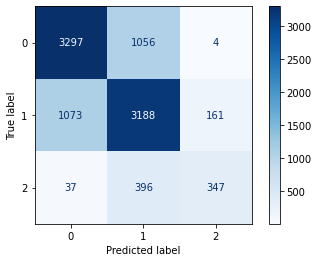

In [124]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf, test_scaled, y_test,
                                 cmap=plt.cm.Blues)

plt.show()

In [128]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
#vypis parametru
params = {
        'n_estimators': stats.randint(150, 1000),
        'learning_rate': stats.uniform(0.01, 0.6),
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0,2],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [6,7,8,9,10]

        }
xgb = XGBClassifier()
#vyber nejlepsich parametru
rs = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, n_jobs=4, cv=5, verbose=3, random_state=1001 )
#trenovani
rs.fit(X, y_train)

#predikce
y_pred = rs.best_estimator_.predict(test_scaled)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\mates\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.72253171 0.71913169 0.73294102        nan]
  warnings.warn(
C:\Users\mates\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:54:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [129]:
accuracy_score(y_test, y_pred)

0.7401401820274087

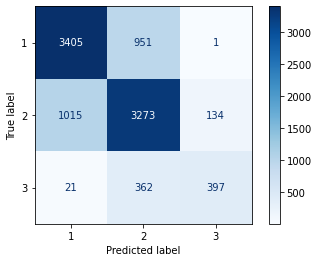

In [130]:
disp = plot_confusion_matrix(rs.best_estimator_, test_scaled, y_test,
                                 cmap=plt.cm.Blues)

plt.show()

In [131]:
importance = rs.best_estimator_.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01182
Feature: 1, Score: 0.01522
Feature: 2, Score: 0.02604
Feature: 3, Score: 0.00927
Feature: 4, Score: 0.01750
Feature: 5, Score: 0.02416
Feature: 6, Score: 0.02595
Feature: 7, Score: 0.02424
Feature: 8, Score: 0.08996
Feature: 9, Score: 0.14107
Feature: 10, Score: 0.13910
Feature: 11, Score: 0.01238
Feature: 12, Score: 0.00867
Feature: 13, Score: 0.01537
Feature: 14, Score: 0.00621
Feature: 15, Score: 0.02299
Feature: 16, Score: 0.01308
Feature: 17, Score: 0.00951
Feature: 18, Score: 0.02868
Feature: 19, Score: 0.00972
Feature: 20, Score: 0.02460
Feature: 21, Score: 0.01358
Feature: 22, Score: 0.02132
Feature: 23, Score: 0.07868
Feature: 24, Score: 0.01116
Feature: 25, Score: 0.01176
Feature: 26, Score: 0.01389
Feature: 27, Score: 0.00971
Feature: 28, Score: 0.07343
Feature: 29, Score: 0.01934
Feature: 30, Score: 0.03418
Feature: 31, Score: 0.01760
Feature: 32, Score: 0.00951
Feature: 33, Score: 0.01028


<AxesSubplot:>

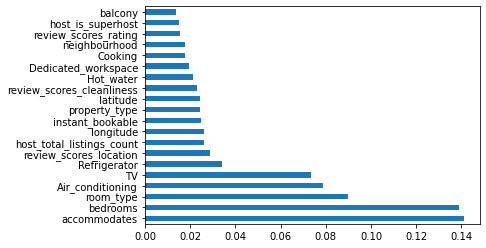

In [132]:
(pd.Series(rs.best_estimator_.feature_importances_, index=X.columns)
   .nlargest(20)
   .plot(kind='barh'))